
# Lecture 1: Introduction
**A few useful things to know about machine learning**

This lecture have materials from mlcourse.ai

 8 homeworks (every two weeks)

 2 kaggle big homeworks

 Quizes :)

In [1]:
pip install matplotlib mglearn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install pandas numpy seaborn jupyter

Defaulting to user installation because normal site-packages is not writeable


## Why Machine Learning?
- Search engines (e.g. Google)
- Recommender systems (e.g. Netflix)
- Automatic translation (e.g. Google Translate)
- Speech understanding (e.g. Siri, Alexa)
- Game playing (e.g. AlphaGo)
- Self-driving cars
- Personalized medicine
- Progress in all sciences: Genetics, astronomy, chemistry, neurology, physics,...

## What is Machine Learning?
- Learn to perform a task, based on experience (examples) $X$, minimizing error $\mathcal{E}$
    - E.g. recognizing a person in an image as accurately as possible
- Often, we want to learn a function (model) $f$ with some model parameters $\theta$ that produces the right output $y$

$$f_{\theta}(X) = y$$
$$\underset{\theta}{\operatorname{argmin}} \mathcal{E}(f_{\theta}(X))$$

- Usually part of a _much_ larger system that provides the data $X$ in the right form
    - Data needs to be collected, cleaned, normalized, checked for data biases,...

### Inductive bias

- In practice, we have to put assumptions into the model: _inductive bias_ $b$
    - What should the model look like?
        - Mimick human brain: Neural Networks
        - Logical combination of inputs: Decision trees, Linear models
        - Remember similar examples: Nearest Neighbors, SVMs
        - Probability distribution: Bayesian models
    - User-defined settings (hyperparameters)
        - E.g. depth of tree, network architecture
    - Assuptions about the data distribution, e.g. $X \sim N(\mu,\sigma)$
- We can _transfer_ knowledge from previous tasks: $f_1, f_2, f_3, ... \Longrightarrow f_{new}$
    - Choose the right model, hyperparameters
    - Reuse previously learned values for model parameters $\theta$
- In short:

$$\underset{\theta,b}{\operatorname{argmin}} \mathcal{E}(f_{\theta, b}(X))$$

## Types of machine learning
- __Supervised Learning__: learn a _model_ $f$ from _labeled data_ $(X,y)$ (ground truth)
    - Given a new input _X_, predict the right output _y_
    - Given examples of stars and galaxies, identify new objects in the sky
- __Unsupervised Learning__: explore the structure of the data (X) to extract meaningful information
    - Given inputs _X_, find which ones are special, similar, anomalous, ...
- __Semi-Supervised Learning__: learn a model from (few) labeled and (many) unlabeled examples
    - Unlabeled examples add information about which new examples are likely to occur
- __Reinforcement Learning__: develop an agent that improves its performance based on interactions with the environment

Note: Practical ML systems can combine many types in one system.

Grocery list
Apple, banana - fruits
Tomato, cucumber - vegetable
List....
Avocado?

### Supervised Machine Learning

- Learn a model from labeled training data, then make predictions
- Supervised: we know the correct/desired outcome (label)
- Subtypes: _classification_ (predict a class) and _regression_ (predict a numeric value)
- Most supervised algorithms that we will see can do both

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_supervised.png" alt="ml" style="width:60%"/>


#### Classification

- Predict a _class label_ (category), discrete and unordered
    - Can be _binary_ (e.g. spam/not spam) or _multi-class_ (e.g. letter recognition)
    - Many classifiers can return a _confidence_ per class
- The predictions of the model yield a _decision boundary_ separating the classes

In [3]:
fig_scale = 1.5

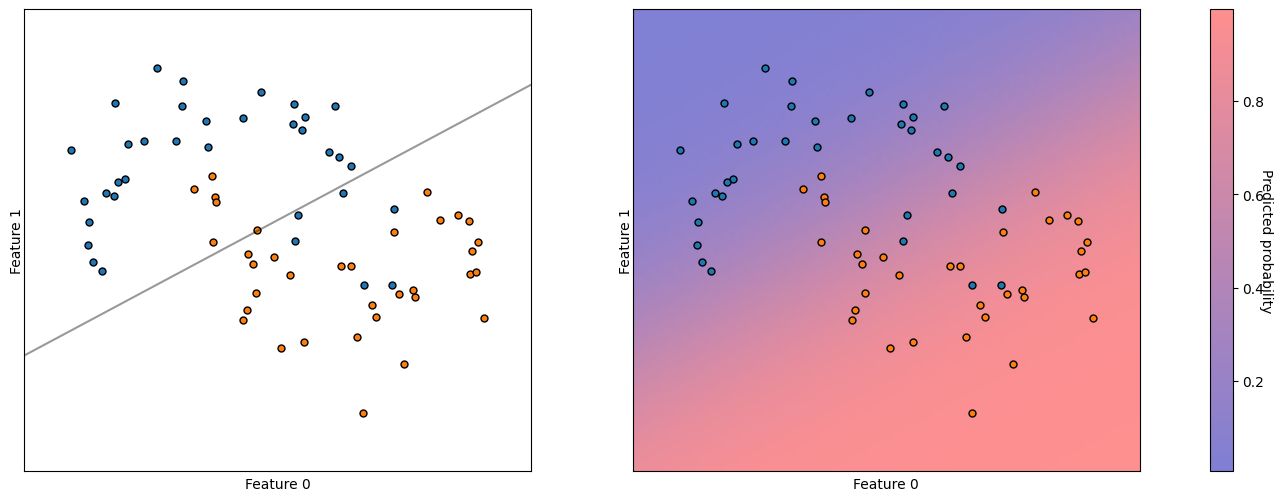

interactive(children=(Dropdown(description='classifier', options=(LogisticRegression(), SVC(gamma=2, probabili…

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
import mglearn

# create a synthetic dataset
X1, y1 = make_moons(n_samples=70, noise=0.2, random_state=8)

# Train classifiers
lr = LogisticRegression().fit(X1, y1)
svm = SVC(kernel='rbf', gamma=2, probability=True).fit(X1, y1)
knn = KNeighborsClassifier(n_neighbors=3).fit(X1, y1)

# Plotting
@interact
def plot_classifier(classifier=[lr,svm,knn]):
    fig, axes = plt.subplots(1, 2, figsize=(12*fig_scale, 4*fig_scale))
    mglearn.tools.plot_2d_separator(
        classifier, X1, ax=axes[0], alpha=.4, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(
        classifier, X1, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
    for ax in axes:
        mglearn.discrete_scatter(X1[:, 0], X1[:, 1], y1,
                                 markers='.', ax=ax)
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1", labelpad=0)
        ax.tick_params(axis='y', pad=0)

    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    cbar.set_label('Predicted probability', rotation=270, labelpad=6)
    cbar.set_alpha(1)
    cbar.draw_all()
    axes[0].legend(["Class 0", "Class 1"], ncol=4, loc=(.1, 1.1));

##### Example: Flower classification
Classify types of Iris flowers (setosa, versicolor, or virginica). How would you do it?

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_iris.jpeg" alt="ml" style="width: 75%;"/>


##### Representation: input features and labels
- We could take pictures and use them (pixel values) as inputs (-> Deep Learning)
- We can manually define a number of input features (variables), e.g. length and width of leaves
- Every `example' is a point in a (possibly high-dimensional) space
    
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_terminology.png" alt="ml" style="float: left; width: 50%;"/>
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_iris3d.png" alt="ml" style="float: left; width: 35%;"/>

#### Regression
- Predict a continuous value, e.g. temperature
    - Target variable is numeric
    - Some algorithms can return a _confidence interval_
- Find the relationship between predictors and the target.

In [ ]:
from mglearn.datasets import make_wave
from mglearn.plot_helpers import cm2
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import numpy as np

X2, y2 = make_wave(n_samples=60)
x = np.atleast_2d(np.linspace(-3, 3, 100)).T
lr = LinearRegression().fit(X2, y2)
ridge = BayesianRidge().fit(X2, y2)
gp = GaussianProcessRegressor(kernel=RBF(10, (1e-2, 1e2)), n_restarts_optimizer=9, alpha=0.1, normalize_y=True).fit(X2, y2)

@interact
def plot_regression(regressor=[lr, ridge, gp]):
    line = np.linspace(-3, 3, 100).reshape(-1, 1)
    plt.figure(figsize=(5*fig_scale, 5*fig_scale))
    plt.plot(X2, y2, 'o', c=cm2(0))
    if(regressor.__class__.__name__ == 'LinearRegression'):
        y_pred = regressor.predict(x)
    else:
        y_pred, sigma = regressor.predict(x, return_std=True)
        plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')

    plt.plot(line, y_pred, 'b-')
    plt.xlabel("Input feature 1")
    plt.ylabel("Target")

### Unsupervised Machine Learning

- Unlabeled data, or data with unknown structure
- Explore the structure of the data to extract information
- Many types, we'll just discuss two.

#### Clustering

- Organize information into meaningful subgroups (clusters)
- Objects in cluster share certain degree of similarity (and dissimilarity to other clusters)
- Example: distinguish different types of customers

In [ ]:
# Note: the most recent versions of numpy seem to cause problems for KMeans
# Uninstalling and installing the latest version of threadpoolctl fixes this

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

nr_samples = 1500

@interact
def plot_clusters(randomize=(1,100,1)):
    # Generate data
    X, y = make_blobs(n_samples=nr_samples, cluster_std=[1.0, 1.5, 0.5], random_state=randomize)
    # Cluster
    y_pred = KMeans(n_clusters=3, random_state=randomize).fit_predict(X)
    # PLot
    plt.figure(figsize=(5*fig_scale, 5*fig_scale))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("KMeans Clusters")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")


### Reinforcement learning

- Develop an agent that improves its performance based on interactions with the environment
    - Example: games like Chess, Go,...
- Search a (large) space of actions and states
- _Reward function_ defines how well a (series of) actions works
- Learn a series of actions (policy) that maximizes reward through exploration

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_rl2.png" alt="ml" style="width: 50%;"/>


Pandas is a powerful Python library that makes it easy to analyze data. It is especially useful for working with data stored in table formats such as .csv, .tsv, or .xlsx. With Pandas, you can easily load, process, and analyze data using SQL-like commands. When used in conjunction with Matplotlib and Seaborn, Pandas provides a wealth of opportunities for visualizing and analyzing tabular data.

The core data structures in Pandas are Series and DataFrames. A Series is a one-dimensional indexed array of a single data type, while a DataFrame is a two-dimensional table where each column contains data of the same type. Think of a DataFrame as a collection of Series objects. DataFrames are ideal for representing real-world data, with each row representing an instance (such as an observation) and each column representing a feature of that instance.

In [ ]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

We demonstrate the main methods in action by analyzing a dataset on the churn rate of telecom operator clients. Let’s read the data (using the read_csv method), and take a look at the first 5 lines using the head method:

In [ ]:
# https://github.com/Yorko/mlcourse.ai repo
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [ ]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")
df.head()

 In Jupyter notebooks, Pandas DataFrames are printed as these pretty tables seen above while print(df.head()) is less nicely formatted. By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the set_option function as shown in the example below:

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Recall that each row corresponds to one client, an instance, and columns are features of this instance.

Let’s have a look at data dimensionality, feature names, and feature types.

In [ ]:
print(df.shape)

Recall that each row corresponds to one client, an instance, and columns are features of this instance.

Let’s have a look at data dimensionality, feature names, and feature types.

In [ ]:
print(df.columns)

We can use the info() method to output some general information about the dataframe:

In [ ]:
print(df.info())

bool, int64, float64 and object are the data types of our features. We see that one feature is logical (bool), 3 features are of type object, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with shape.

We can change the column type with the astype method. Let’s apply this method to the Churn feature to convert it into int64:

In [ ]:
df.isna()

In [ ]:
df["Churn"] = df["Churn"].astype("int64")

In [ ]:
df["Voice mail plan"].astype("bool").value_counts()

The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [ ]:
df.describe()

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.

In [ ]:
df.describe(include=["object", "bool"])

For categorical (type object) and boolean (type bool) features we can use the value_counts method. Let’s take a look at the distribution of Churn:

In [ ]:
df["Churn"].value_counts()

2850 users out of 3333 are loyal; their Churn value is 0. To calculate fractions, pass normalize=True to the value_counts function.

In [ ]:
df["Churn"].value_counts(normalize=True)


### Sorting

A `DataFrame` can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [ ]:
df.sort_values(by="Total day charge", ascending=False).head()

We can also sort by multiple columns:

In [ ]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()


### Indexing and retrieving data

A `DataFrame` can be indexed in a few different ways.

To get a single column, you can use a `DataFrame['Name']` construction. Let's use this to answer a question about that column alone: **what is the proportion of churned users in our dataframe?**



In [ ]:
df["Churn"].mean()


14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the `DataFrame` consisting only of rows that satisfy the `P` condition on the `Name` column.

Let's use it to answer the question:

**What are average values of numerical features for churned users?**


In [ ]:
df[df["Churn"] == 1].mean()

In [ ]:
df[df["Churn"] == 0].mean()

**How much time (on average) do churned users spend on the phone during daytime?**

In [ ]:
df[df["Churn"] == 1]["Total day minutes"].mean()


**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**



In [ ]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()


DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say *"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*. In the second case, we say *"give us the values of the first five rows in the first three columns"* (as in a typical Python slice: the maximal value is not included).


In [ ]:
df.loc[0:5, "State":"Area code"]

In [ ]:
df.iloc[0:5, 0:3]

If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construction:

In [ ]:
df[-1:]

In [ ]:
df[:1]


### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [ ]:
df.apply(np.max)

The `apply` method can also be used to apply a function to each row. To do this, specify `axis=1`. Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with 'W', we can do it like this:

In [ ]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument:

In [ ]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

Almost the same thing can be done with the `replace` method.

<details>
<summary>Difference in treating values that are absent in the mapping dictionary</summary>
<p>
There's a slight difference. `replace` method will not do anything with values not found in the mapping dictionary, while `map` will change them to NaNs).

```python
a_series = pd.Series(['a', 'b', 'c'])
a_series.replace({'a': 1, 'b': 2})     # 1, 2, c
a_series.map({'a': 1, 'b': 2})     # 1, 2, NaN
```
</p>
</details>



In [ ]:
df = df.replace({"Voice mail plan": d})
df.head()


### Grouping

In general, grouping data in Pandas works as follows:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [ ]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

In [ ]:
df.groupby(["Churn"])[columns_to_show]

Let’s do the same thing, but slightly differently by passing a list of functions to `agg()`:

In [ ]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])


### Summary tables

Suppose we want to see how the observations in our dataset are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:



In [ ]:
pd.crosstab(df["Churn"], df["International plan"])

In [ ]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

Let’s take a look at the average number of day, evening, and night calls by area code:

In [ ]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)


### DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users, let’s create the `total_calls` Series and paste it into the DataFrame:



In [ ]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

It is possible to add a column more easily without creating an intermediate Series instance:

In [ ]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

To delete columns or rows, use the `drop` method, passing the required indexes and the `axis` parameter (`1` if you delete columns, and nothing or `0` if you delete rows). The `inplace` argument tells whether to change the original DataFrame. With `inplace=False`, the `drop` method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With `inplace=True`, it alters the DataFrame.

In [ ]:
# get rid of just created columns
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

In [ ]:
df = df.drop(["Total charge", "Total calls"], axis=1)


## 2. First attempt at predicting telecom churn


Let's see how churn rate is related to the *International plan* feature. We’ll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn`.


In [ ]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

In [ ]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

# import some nice vis settings
sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [ ]:
sns.countplot(x="International plan", hue="Churn", data=df);


We see that, with *International Plan*, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let’s look at another important feature – *Customer service calls*. Let’s also make a summary table and a picture.

In [ ]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

In [ ]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let's add a binary feature to our DataFrame – `Customer service calls > 3`. And once again, let's see how it relates to churn.

In [ ]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

In [ ]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df);


Let’s construct another contingency table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*.



In [ ]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"])

Churn 0 We predict 1 - False positive(9)

Churn 1 We predict 0 - False negative(464)


Therefore, predicting that a customer is not loyal (*Churn*=1) in the case when the number of calls to the service center is greater than 3 and the *International Plan* is added (and predicting *Churn*=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times). This number, 85.8%, that we got through this very simple reasoning serves as a good starting point (*baseline*) for the further machine learning models that we will build.

As we move on through this course, recall that, before the advent of machine learning, the data analysis process looked something like this. Let's recap what we've covered:
    
- The share of loyal clients in the dataset is 85.5%. The most naive model that always predicts a "loyal customer" on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (*accuracy*) of subsequent models should be no less than this number, and will hopefully be significantly higher;
- With the help of a simple prediction that can be expressed by the following formula: `International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0`, we can expect a guessing rate of 85.8%, which is just above 85.5%. Subsequently, we'll talk about decision trees and figure out how to find such rules **automatically** based only on the input data;
- We got these two baselines without applying machine learning, and they’ll serve as the starting point for our subsequent models. If it turns out that with enormous effort, we increase accuracy by only 0.5%, persay, then possibly we are doing something wrong, and it suffices to confine ourselves to a simple "if-else" model with two conditions;
- Before training complex models, it is recommended to wrangle the data a bit, make some plots, and check simple assumptions. Moreover, in business applications of machine learning, they usually start with simple solutions and then experiment with more complex ones.



Thank you!